### Water Quality Dataset

#### Purpose:

I perform exploratory data analysis (EDA) to inspect the water quality dataset. Here are the findings:
- The initial dataset contain NaN values. *61.0%* of data is left after removing the Nan values across the rows.
- Most of the observations *occur near the mean* as seen from the violin plot. 
- From the pie chart, *40.3% of the entries are potable water*. The rest are non-potable.
- The correlations between any two factors were *generally poor*. Six pairs seem to stand out, but only with absolute correlation values between 0.05 and 0.14.
- From the labeled histograms, there seems to be *no obvious correlation* between the EPA standard for drinking water acceptable limits with the potability labels in the dataset.
- Principal component analysis (pca) was *not effective* in capturing certain features amongst the nine factors to reduce the number of parameters to correlate to the water's potability.  

Dataset Source: LAKSIKA THARMALINGAM, "Water Quality and Potability", url: https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability (Downloaded on Dec 9, 2023)

<b>About the Dataset:</b>

This dataset contains information about water quality and its suitability for drinking. Each row is a water sample, along with the measured values, as well as the "Potability" indicating its suitability for consumption. The factors are as follows:

- pH: Measures water acidity.
- Hardness: Indicates mineral content in water.
- Solids: Total dissolved solids present.
- Chloramines: Measures chloramines in water.
- Sulfate: Shows sulfate concentration.
- Conductivity: Measures water's electrical conductivity.
- Organic_carbon: Measures organic carbon content.
- Trihalomethanes: Indicates trihalomethanes concentration.
- Turbidity: Measures water clarity.
- Potability: Shows if water is safe (1) or not (0) for drinking.

#### Table of Contents

1. [Download and Process Data](#1-download-and-process-data)
2. [Inspect Data](#2-inspect-data)
3. [Apply principal component anaysis (pca) to extract features](#3-apply-pca-to-extract-features)

[Appendix A. Iris Dataset PCA](#A-iris-dataset-pca-demonstration)

***

#### 1. <a name="1-download-and-process-data">Download and Process Data</a>

1.1. Download

In [1]:
import warnings

#hide deprecation warning 
warnings.filterwarnings('ignore')

import pandas as pd

df=pd.read_csv("data/water_potability.csv")

# Counting NaN values
print("Get number of Nan Values for each column")
nan_count = df.isna().sum()
print(nan_count)

print("")
print(f"Total number of entries: {len(df)}")


Get number of Nan Values for each column
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Total number of entries: 3276


In [2]:
#remove NaN
df.dropna(inplace=True, axis=0)
df.reset_index(drop=True, inplace=True)

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


1.2. Inspect

In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [4]:
df.nunique(axis=0)

ph                 2011
Hardness           2011
Solids             2011
Chloramines        2011
Sulfate            2011
Conductivity       2011
Organic_carbon     2011
Trihalomethanes    2011
Turbidity          2011
Potability            2
dtype: int64

In [5]:
print(f"Fraction of data without NaNs: {round(2011/3276,2)} or {100*round(2011/3276,2)} %")

Fraction of data without NaNs: 0.61 or 61.0 %


<div style="background-color: cyan; color: black;">
• The number of dataset started out at 3276 and got reduced to 2011 (61.0% remaining) after removing the NaN values.
    
• As expected, the potability category shows only two unique values (0=non=potable and 1=potable). The rest of the categories have unique values. 
</div>

1.3. Visualize

(a) Inspect the distribution of the data.

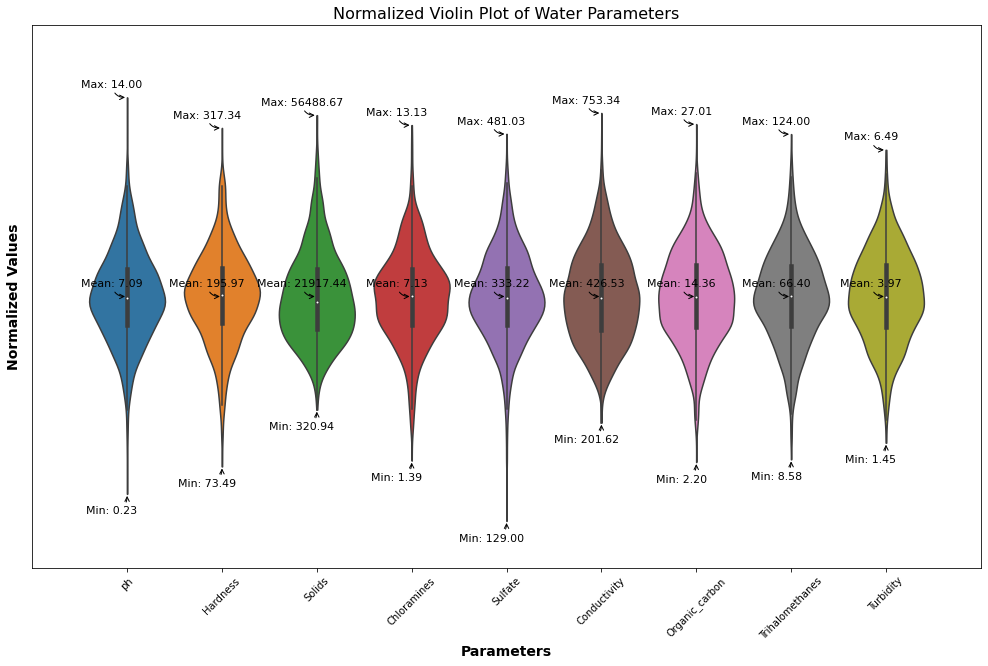

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# Normalizing the data for violin plot
df_normalized = (df - df.mean()) / df.std()

# Creating a violin plot using Seaborn with normalized data
plt.figure(figsize=(17, 10))
violin = sns.violinplot(data=df_normalized.drop('Potability', axis=1), cut=0, scale='count')
plt.xticks(rotation=45)
plt.title('Normalized Violin Plot of Water Parameters', fontsize=16)
plt.xlabel('Parameters', fontweight='bold', fontsize=14)
plt.ylabel('Normalized Values', fontweight='bold', fontsize=14)

# Calculate and annotate mean, min, max for each column in original data
for i, column in enumerate(df.columns[:-1]):
    mean_val = df[column].mean()
    min_val = df[column].min()
    max_val = df[column].max()

    # Annotate the actual mean, min, max values on the plot
    violin.annotate(f"Mean: {mean_val:.2f}", xy=(i, (mean_val - df[column].mean()) / df[column].std()), xytext=(-15, 10),
                    textcoords='offset points', ha='center', fontsize=11,
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='black'))
    violin.annotate(f"Min: {min_val:.2f}", xy=(i, (min_val - df[column].mean()) / df[column].std()), xytext=(-15, -20),
                    textcoords='offset points', ha='center', fontsize=11,
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='black'))
    violin.annotate(f"Max: {max_val:.2f}", xy=(i, (max_val - df[column].mean()) / df[column].std()), xytext=(-15, 10),
                    textcoords='offset points', ha='center', fontsize=11,
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='black'))

    
violin.set(ylim=(-6, 6))
violin.tick_params(left=False)
violin.set(yticklabels=[])

# Setting more white space on both sides of the violin plot
plt.xlim(-1, len(df.columns)-1)  # Adjust the limits for x-axis


plt.show()

<div style="background-color: cyan; color: black;">
Although the distribution of data may not be normally distributed, all show the majority of observation near the mean.
</div>

(b) Inspect the ratio of potable and non-potable entries

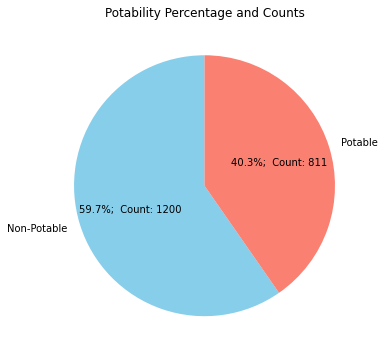

In [7]:
# Count occurrences of Potability values
potability_counts = df['Potability'].value_counts()

# Plotting a pie chart with annotations for counts and percentages
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(potability_counts, labels=['Non-Potable', 'Potable'], autopct='%1.1f%%;',
                                    colors=['skyblue', 'salmon'], startangle=90)

# Add count annotations
count_labels = [f'Count: {count}' for count in potability_counts]

for i, (autotext, count_label) in enumerate(zip(autotexts, count_labels)):
    autotext.set_text(f'{autotext.get_text()}  {count_label}')

plt.title('Potability Percentage and Counts')
plt.show()

<div style="background-color: cyan; color: black;">
The data contains more non-potable than potable water.
</div>

#### <a name="2-inspect-data">2. Inpect Data</a>

2.1. Look for correlations
- mwaskom, "Suggestion for gallery addition: scatter + correlation with PairGrid", url: https://github.com/mwaskom/seaborn/issues/1444 (Retrieved on: Dec 10, 2022)

There are no spectacular correlation between any two factors, which may imply interactions between factors. The ones that stand out (≥0.5) are:
 - Hardness and pH
 - Solids and pH
 - Solids and Hardness
 - Sulfate and Hardness
 - Sulfate and Solids
 - Turbidity and pH
  

<table border="1" style="border-collapse: collapse; width: 100%; text-align: center; border: 1px solid black;">
  <tr>
    <th style="border: 1px solid black;"></th>
    <th style="border: 1px solid black; text-align: center; ">Hardness</th>
    <th style="border: 1px solid black; text-align: center; ">Solids</th>
    <th style="border: 1px solid black; text-align: center; ">Sulfate</th>
    <th style="border: 1px solid black; text-align: center; ">Turbidity</th>
    <th style="border: 1px solid black; text-align: center; ">pH</th>
  </tr>
  <tr>
    <th style="border: 1px solid black; text-align: center; ">Hardness</th>
    <td style="background-color: black; border: 1px solid black;"></td>
    <td style="background-color: black; text-align: center; border: 1px solid black;">x</td>
    <td style="background-color: black; text-align: center; border: 1px solid black;">x</td>
    <td style="background-color: black; border: 1px solid black;"></td>
    <td style="background-color: black; text-align: center; border: 1px solid black;">x</td>
  </tr>
  <tr>
    <th style="border: 1px solid black; text-align: center; ">Solids</th>
    <td style="background-color: cyan; text-align: center; border: 1px solid black;">x</td>
    <td style="background-color: black; border: 1px solid black;"></td>
    <td style="background-color: black; text-align: center; border: 1px solid black;">x</td>
    <td style="background-color: black; border: 1px solid black;"></td>
    <td style="background-color: black; text-align: center; border: 1px solid black;">x</td>
  </tr>
  <tr>
    <th style="border: 1px solid black; text-align: center; ">Sulfate</th>
    <td style="background-color: cyan; text-align: center; border: 1px solid black;">x</td>
    <td style="background-color: cyan; text-align: center; border: 1px solid black;">x</td>
    <td style="background-color: black; border: 1px solid black;"></td>
    <td style="background-color: black; border: 1px solid black;"></td>
    <td style="background-color: black; border: 1px solid black;"></td>
  </tr>
  <tr>
    <th style="border: 1px solid black; text-align: center; ">Turbidity</th>
    <td style="border: 1px solid black;"></td>
    <td style="border: 1px solid black;"></td>
    <td style="border: 1px solid black;"></td>
    <td style="background-color: black; border: 1px solid black;"></td>
    <td style="background-color: black; text-align: center; border: 1px solid black;">x</td>
  </tr>
  <tr>
    <th style="border: 1px solid black; text-align: center;">pH</th>
    <td style="background-color: cyan; text-align: center; border: 1px solid black;">x</td>
    <td style="background-color: cyan; text-align: center; border: 1px solid black;">x</td>
    <td style="border: 1px solid black;"></td>
    <td style="background-color: cyan; text-align: center; border: 1px solid black;">x</td>
    <td style="background-color: black; border: 1px solid black;"></td>
  </tr>
</table>


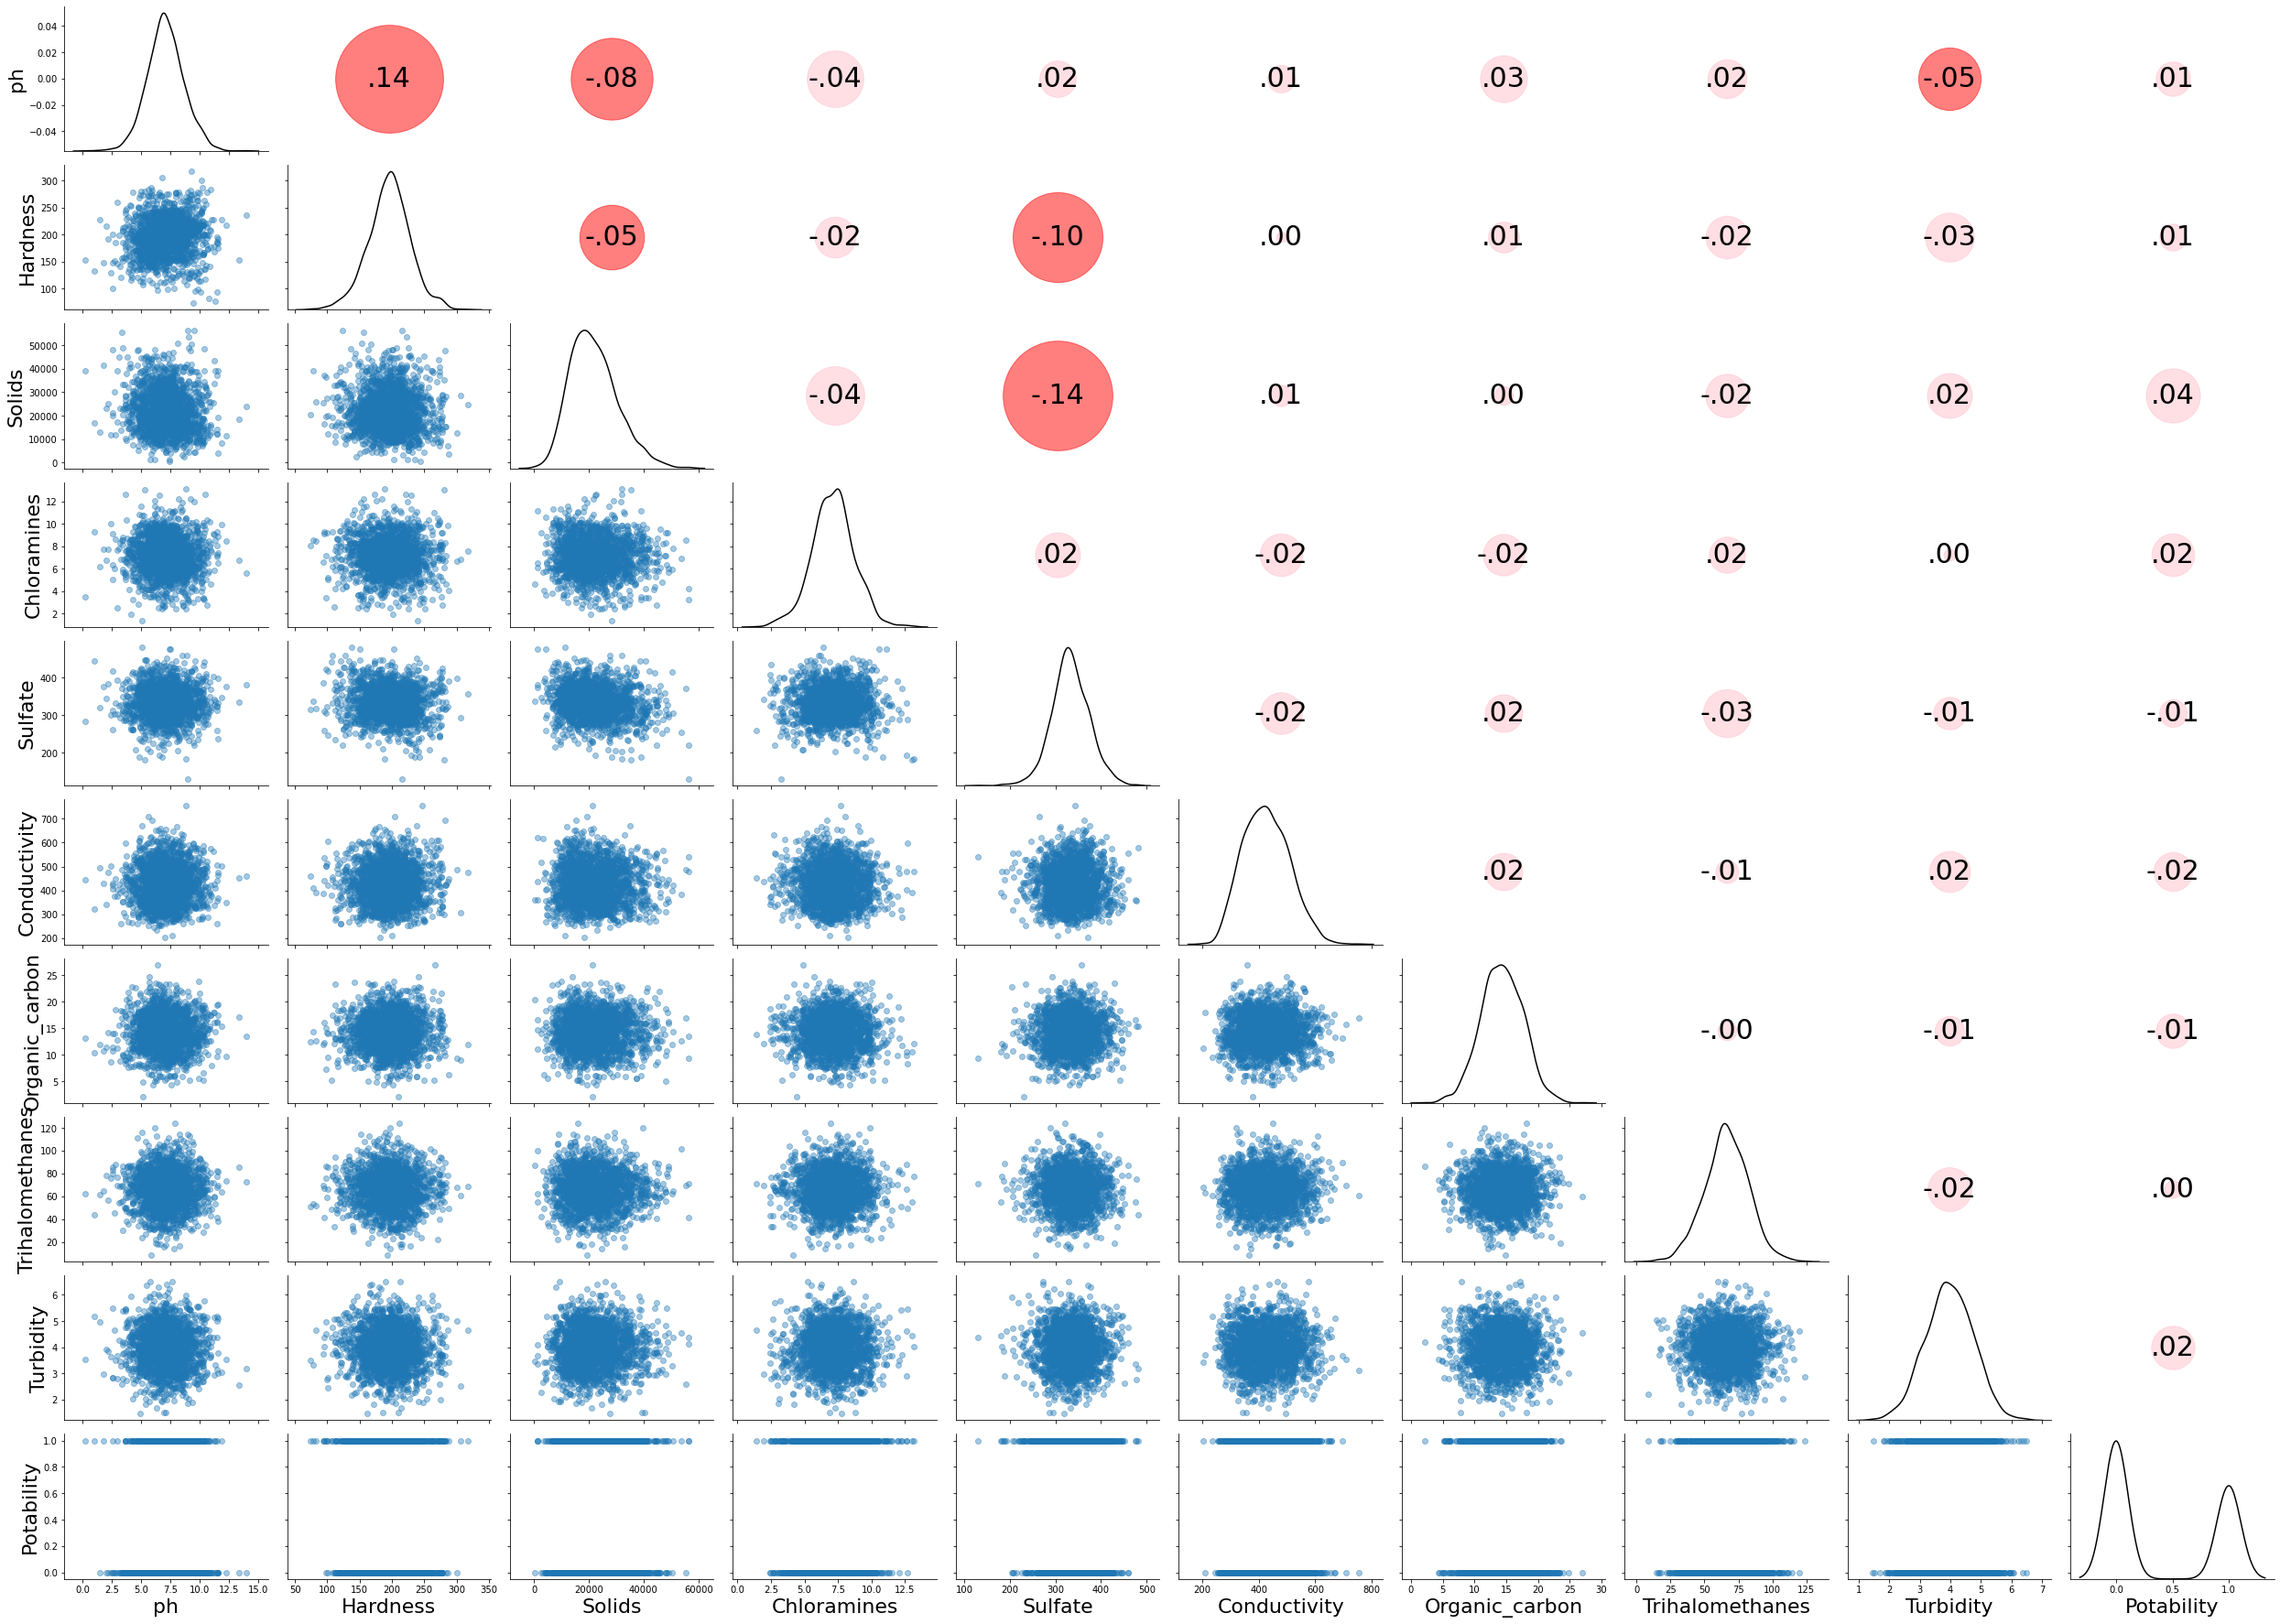

In [8]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    
    marker_size = abs(corr_r) * 100000  # Adjust the scaling factor for circle size
    
    if abs(round(corr_r,2))>=0.05:
        color='red'
    else:
        color='pink'
        
    ax.scatter(.5, .5, marker_size, color=color, alpha=0.5, cmap="vlag", vmin=-1, vmax=1, transform=ax.transAxes)
    ax.annotate(corr_text, [.5, .5],  xycoords="axes fraction", ha='center', va='center', fontsize=30)
    
    
g = sns.PairGrid(df, aspect=1.4, diag_sharey=False)
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(sns.distplot, color='black', hist=False)

# Set all x-axis and y-axis label font sizes to 20
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        g.axes[i, j].xaxis.label.set_size(22)
        g.axes[i, j].yaxis.label.set_size(22)

g.map_upper(corrdot)
plt.show()

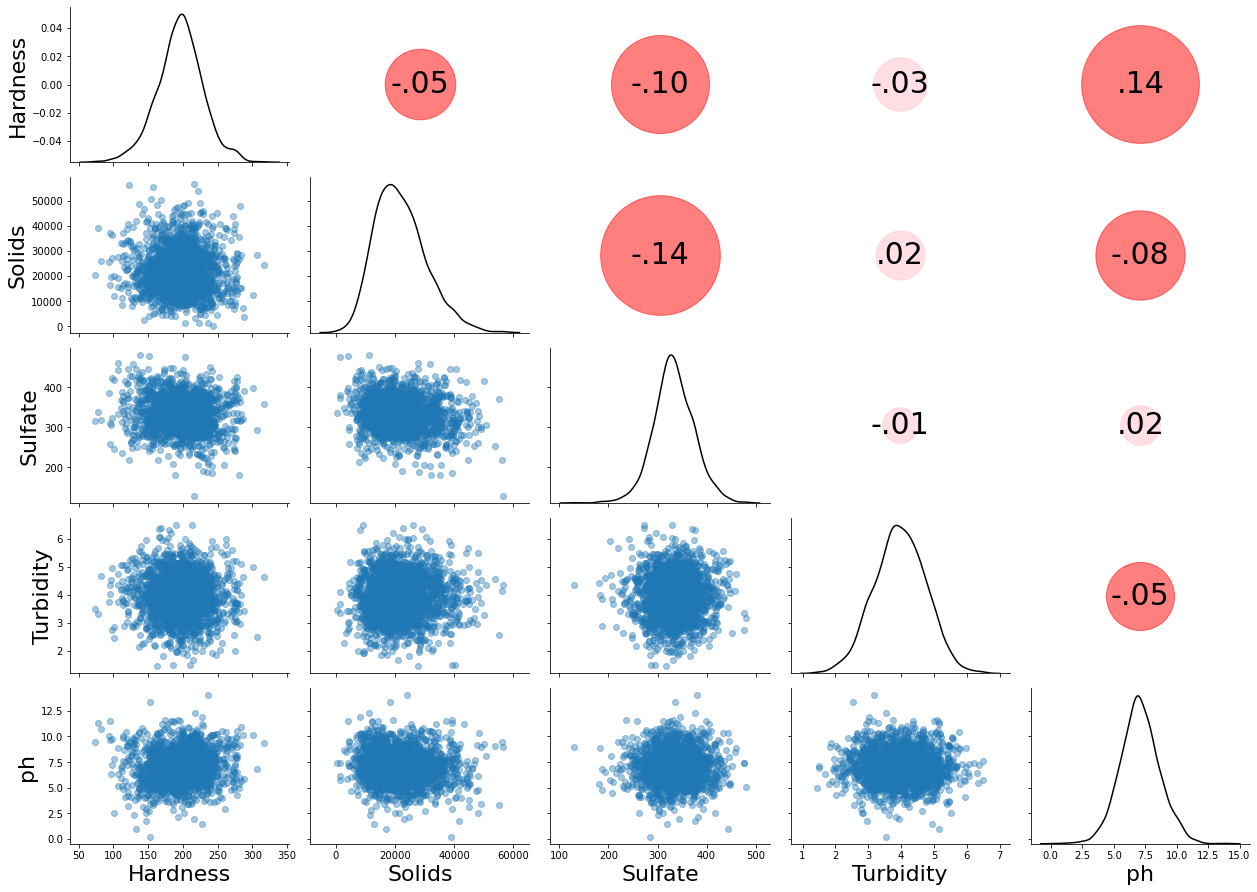

In [9]:
#plot only Hardness, Solids, Sulfate, Turbidity, and pH factors

df2=df.copy()
df2=df2.loc[:,["Hardness", "Solids", "Sulfate", "Turbidity", "ph"]]

g = sns.PairGrid(df2, aspect=1.4, diag_sharey=False)
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(sns.distplot, color='black', hist=False)

# Set all x-axis and y-axis label font sizes to 20
for i in range(len(df2.columns)):
    for j in range(len(df2.columns)):
        g.axes[i, j].xaxis.label.set_size(22)
        g.axes[i, j].yaxis.label.set_size(22)

g.map_upper(corrdot)
plt.show()

2.2. Categorize water by the individual criteria.

Ref.: 

- Leonard Püttmann, "Water quality dataset", url: https://deepnote.com/@leonard-puttmann-a8ef/Water-quality-dataset-14a5f99f-9b81-49c9-9327-973b1c9f0b1f (Accessed on: Dec 10, 2023)
            
- United States Environmental Protection Agency, "Drinking Water Advisory: Consumer Acceptability Advice and Health Effects Analysis on Sulfate", url: https://www.epa.gov/sites/default/files/2014-09/documents/support_cc1_sulfate_healtheffects.pdf (Accessed on: Dec 10, 2023)

- United States Environmental Protection Agency, "Drinking Water Regulations and Contaminants ", url: https://www.epa.gov/sdwa/drinking-water-regulations-and-contaminants (Accessed on: Dec 10, 2023)

<table border="1" style="border-collapse: collapse; width: 100%; text-align: center; border: 1px solid black;">
  <tr>
    <th style="background-color: gray; text-align: center; border: 1px solid black;">"Factor"</th>
    <th style="background-color: gray; text-align: center; border: 1px solid black; text-align: center; ">Range</th>
  </tr>  

  <tr>
    <th style="text-align: center; border: 1px solid black;">ph</th>
    <th style="text-align: center; border: 1px solid black; text-align: center; ">6.5-8.5</th>
  </tr>
   
  <tr>
    <th style="text-align: center; border: 1px solid black;">Hardness</th>
    <th style="text-align: center; border: 1px solid black; text-align: center; "> ≤ 25 mg/: </th>
  </tr>
    
  <tr>
    <th style="text-align: center; border: 1px solid black;">Solids</th>
    <th style="text-align: center; border: 1px solid black; text-align: center; ">500-1000 mg/L</th>
  </tr>

  <tr>
    <th style="text-align: center; border: 1px solid black;">Chloramines</th>
    <th style="text-align: center; border: 1px solid black; text-align: center; "> ≤ 4 mg/L</th>
  </tr>

  <tr>
    <th style="text-align: center; border: 1px solid black;">Sulfate</th>
    <th style="text-align: center; border: 1px solid black; text-align: center; "> ≤ 250 mg/L </th>
  </tr>
   
  <tr>
    <th style="text-align: center; border: 1px solid black;">Conductivity</th>
    <th style="text-align: center; border: 1px solid black; text-align: center; "> ≥ 400 μS/cm </th>
      
  </tr>

  <tr>
    <th style="text-align: center; border: 1px solid black;">Organic carbon</th>
    <th style="text-align: center; border: 1px solid black; text-align: center; "> ≤ 2 mg/L</th>
  </tr>
    
  <tr>
    <th style="text-align: center; border: 1px solid black;">Trihalomethanes</th>
    <th style="text-align: center; border: 1px solid black; text-align: center; "> ≤ 80 ppm </th>
  </tr>
    
  <tr>
    <th style="text-align: center; border: 1px solid black;">Turbidity</th>
    <th style="text-align: center; border: 1px solid black; text-align: center; "> ≤ 5.00 NTU </th>
  </tr>
   
  <tr>
    <th style="text-align: center; border: 1px solid black;">Potability</th>
    <th style="text-align: center; border: 1px solid black; text-align: center; "> 1 </th>
      
  </tr>


        
</table>

In [10]:
#Determine the acceptable range for each factor according to the potability label

#ph:
ph_min=round(df[df['Potability']==1]['ph'].min(),2)
ph_max=round(df[df['Potability']==1]['ph'].max(),2)

print(f"ph min: {ph_min}, ph max: {ph_max}")

#Hardness:
hardness_min=round(df[df['Potability']==1]['Hardness'].min(),2)
hardness_max=round(df[df['Potability']==1]['Hardness'].max(),2)

print(f"Hardness min: {hardness_min}, Hardness max: {hardness_max}")

#Solids:
solids_min=round(df[df['Potability']==1]['Solids'].min(),2)
solids_max=round(df[df['Potability']==1]['Solids'].max(),2)

print(f"Solids min: {solids_min}, Solids max: {solids_max}")

#Chloramines:
chloramines_min=round(df[df['Potability']==1]['Chloramines'].min(),2)
chloramines_max=round(df[df['Potability']==1]['Chloramines'].max(),2)

print(f"Chloramines min: {chloramines_min}, Chloramines max: {chloramines_max}")

#Sulfate:
sulfate_min=round(df[df['Potability']==1]['Sulfate'].min(),2)
sulfate_max=round(df[df['Potability']==1]['Sulfate'].max(),2)

print(f"Sulfate min: {sulfate_min}, Sulfate max: {sulfate_max}")

#Conductivity:
conductivity_min=round(df[df['Potability']==1]['Conductivity'].min(),2)
conductivity_max=round(df[df['Potability']==1]['Conductivity'].max(),2)

print(f"Conductivity min: {conductivity_min}, Conductivity max: {conductivity_max}")

#Organic carbon:
organic_carbon_min=round(df[df['Potability']==1]['Organic_carbon'].min(),2)
organic_carbon_max=round(df[df['Potability']==1]['Organic_carbon'].max(),2)

print(f"Organic carbon min: {organic_carbon_min}, Organic carbon max: {organic_carbon_max}")


#Trihalomethanes:
trihalomethanes_min=round(df[df['Potability']==1]['Trihalomethanes'].min(),2)
trihalomethanes_max=round(df[df['Potability']==1]['Trihalomethanes'].max(),2)

print(f"Trihalomethanes min: {trihalomethanes_min}, Trihalomethanes max: {trihalomethanes_max}")

#Turbidity:
turbidity_min=round(df[df['Potability']==1]['Turbidity'].min(),2)
turbidity_max=round(df[df['Potability']==1]['Turbidity'].max(),2)

print(f"Turbidity min: {turbidity_min}, Turbidity max: {turbidity_max}")

ph min: 0.23, ph max: 11.9
Hardness min: 73.49, Hardness max: 317.34
Solids min: 1198.94, Solids max: 56488.67
Chloramines min: 1.39, Chloramines max: 13.13
Sulfate min: 129.0, Sulfate max: 481.03
Conductivity min: 201.62, Conductivity max: 695.37
Organic carbon min: 2.2, Organic carbon max: 23.6
Trihalomethanes min: 8.58, Trihalomethanes max: 124.0
Turbidity min: 1.49, Turbidity max: 6.49


2.3. Color histograms by criteria

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Criteria
criteria = {
    'ph': (6.5, 8.5),
    'Hardness': (0, 25),
    'Solids': (500, 1000),
    'Chloramines': (0, 4),
    'Sulfate': (0, 250),
    'Conductivity': (400, 1000),
    'Organic_carbon': (0, 2),
    'Trihalomethanes': (0, 80),
    'Turbidity': (0, 5)
}

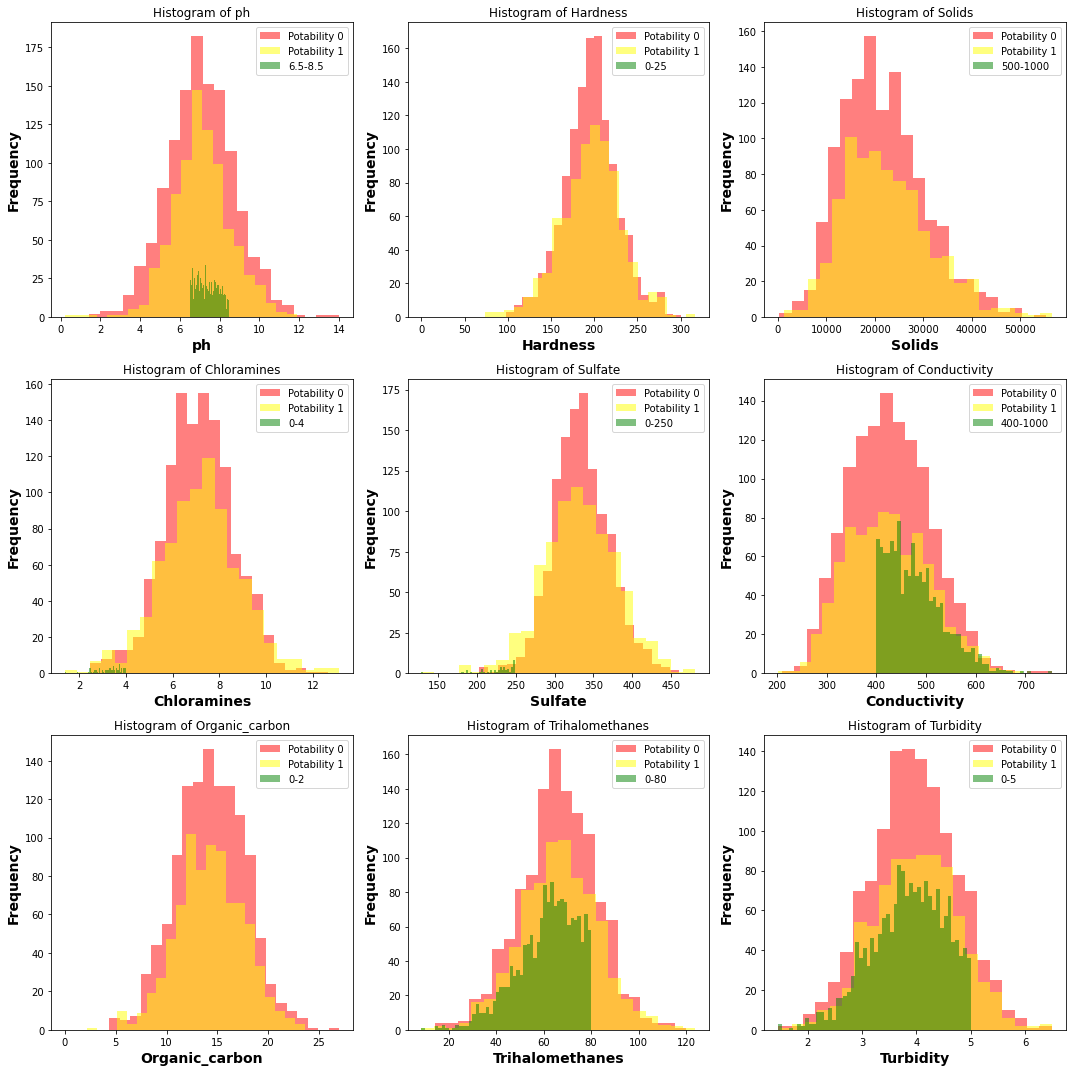

In [12]:
# Define colors for Potability labels
colors = {0: 'red', 1: 'yellow'}

# Create subplots in a 3x3 grid
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plotting histograms
for i, column in enumerate(df.columns):
    if column != 'Potability':
        row = i // 3
        col = i % 3
        ax = axs[row, col]

        for potability, color in colors.items():
            mask = df['Potability'] == potability
            ax.hist(df.loc[mask, column], color=color, alpha=0.5, label=f'Potability {potability}', bins=22)
            
        if column in criteria:
            green_mask = df[column].between(*criteria[column])
            ax.hist(df.loc[green_mask, column], color='green', alpha=0.5, label=f"{criteria[column][0]}-{criteria[column][1]}", bins=50)
        
        ax.set_xlabel(column, fontsize=14, fontweight='bold')
        ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
        ax.set_title(f'Histogram of {column}')
        ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

<div style="background-color: cyan; color: black;">
The data potability classification doesn't seem to coincide with the EPA criteria.
</div>

#### <a name="3-apply-pca-to-extract-features"> 3. Apply principal component analysis (pca) to extract features </a>

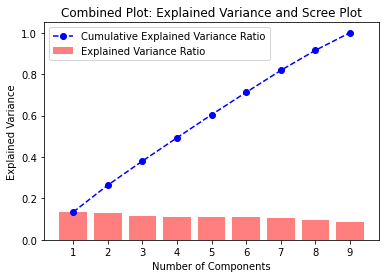

Cumulative Variance Explained by each Principal Component:


NameError: name 'cumulative_var_ratio' is not defined

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


#normalize datasets
from sklearn.preprocessing import StandardScaler

features = df[df.columns[:-1]]
scaled_features = StandardScaler().fit_transform(features)


n=len(df.columns)-1

pca = PCA(n_components=n)
principalComponents = pca.fit_transform(scaled_features)

cumulative_variance = pca.explained_variance_ratio_.cumsum()

fig, ax1 = plt.subplots()

# Plotting the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         marker='o', linestyle='--', color='blue', label="Cumulative Explained Variance Ratio")
plt.bar(range(1, len(cumulative_variance) + 1), pca.explained_variance_ratio_, 
        align='center', alpha=0.5, color='red', label="Explained Variance Ratio")

plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Combined Plot: Explained Variance and Scree Plot')
plt.xticks(np.arange(1, 10, 1))

plt.legend()
plt.show()

print("Cumulative Variance Explained by each Principal Component:")
print(cumulative_var_ratio)

<div style="background-color: cyan; color: black;">
Principal component analysis doesn't look effective in reducing the number of factor to less than 9. There seems to be no correlations between the factors. Moreover, there is not a single principal component that seems to capture the most amount of imformation.   
</div>

In [ ]:
# Separate data based on Potability
potable = df_pca['Potability'] == 1
non_potable = df_pca['Potability'] == 0

# Scatter plot
plt.scatter(df_pca['PCA1'][potable], df_pca['PCA2'][potable], color='blue', label='Potable')
plt.scatter(df_pca['PCA1'][non_potable], df_pca['PCA2'][non_potable], color='red', label='Non-Potable')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Scatter Plot of PCA1 vs PCA2 (Color-coded by Potability)')
plt.legend()
plt.show()

<div style="background-color: cyan; color: black;">
The above shows a plot of PCA1 versus PCA2 labeled according to its Potability. As expected, no obvious clustering is observed.
</div>

#### <a name="A-iris-dataset-pca-demonstration"> Appendix A. Iris Dataset PCA Demonstration</a>
- scikit-learn, "PCA example with Iris Data-set", url: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html (Accessed on: Dec 11, 2023)

In [ ]:
from sklearn import datasets, decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


# Plotting the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         marker='o', linestyle='--', color='blue', label="Cumulative Explained Variance Ratio")
plt.bar(range(1, len(cumulative_variance) + 1), pca.explained_variance_ratio_, 
        align='center', alpha=0.5, color='red', label="Explained Variance Ratio")

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance', color='blue')
plt.title('Combined Plot: Explained Variance and Scree Plot')

plt.legend(loc='best')
plt.show()

In [ ]:
df_pca=pd.DataFrame({'PCA1': X[:,0], 'PCA2': X[:,1], 'PCA3': X[:,2], 'Labels': y})

iris.target_names #get species labels

In [ ]:
setosa = df_pca['Labels'] == 0
versicolor = df_pca['Labels'] == 1
virginica = df_pca['Labels'] == 2

# Scatter plot
plt.scatter(df_pca['PCA1'][setosa], df_pca['PCA2'][setosa], color='red', label='Setosa')
plt.scatter(df_pca['PCA1'][versicolor], df_pca['PCA2'][versicolor], color='green', label='Versicolor')
plt.scatter(df_pca['PCA1'][virginica], df_pca['PCA2'][virginica], color='blue', label='Virginica')


plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Scatter Plot of PCA1 vs PCA2 (Color-coded by Potability)')
plt.legend()
plt.show()

<div style="background-color: cyan; color: black;">
The above shows that two components are sufficient to differentiate Versicolor and Virginica from Setosa, but not between Versicolor and Virginica.
</div>

In [ ]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X_pca[y == label, 0].mean(),
        X_pca[y == label, 1].mean() + 1.5,
        X_pca[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )

# Reorder the labels to have colors matching the cluster results
colors = {0: 'r', 1: 'g', 2: 'b'}
color_mapping = np.array([colors[val] for val in y])

# Scatter plot with different colors
ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
    c=color_mapping, cmap=plt.cm.nipy_spectral, edgecolor="k"
)

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()


<div style="background-color: cyan; color: black;">
The above plot shows that all three components are needed to fully distinguish between the three flower species.
</div>

***